# Generate H5AD Input

In [1]:
# Import Packages

%load_ext autoreload
%autoreload 2

import os
# import warnings 
# warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from anndata import AnnData

# Customized packages
import starmap.sc_util as su

## Input

In [3]:
# Set path
ppath = 'Z:/Data/Processed/2022-09-12-Rena-HeLa16Gene/output'
areas = range(1,8)

In [18]:
# Load whole cell data
structure = 'whole_cell'
expr_path = os.path.join(ppath, structure, 'complete_cell_barcode_count.csv')
var_path = os.path.join(ppath, structure, 'cell_barcode_names.csv')
obs_path = os.path.join(ppath, structure, 'complete_meta.csv')

expr_x = np.loadtxt(expr_path, delimiter=',')
var = pd.read_csv(var_path, header=None)
var = pd.DataFrame(index=var.iloc[:,2].to_list())
obs = pd.read_csv(obs_path, index_col=0)

In [19]:
# create AnnData object
adata = AnnData(X=expr_x.astype('int'), var=var, obs=obs)
adata

c:\Users\wangk\.conda\envs\connie\lib\site-packages\anndata\_core\anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 3676 × 16
    obs: 'orig_index', 'sample', 'area', 'x', 'y', 'z'

In [20]:
# Load nucleus data
structure = 'nucleus'
expr_path = os.path.join(ppath, structure, 'complete_cell_barcode_count.csv')
var_path = os.path.join(ppath, structure, 'cell_barcode_names.csv')
obs_path = os.path.join(ppath, structure, 'complete_meta.csv')

# Add expression data to the AnnData object 
expr_x = np.loadtxt(expr_path, delimiter=',')
var = pd.read_csv(var_path, header=None)
var = pd.DataFrame(index=var.iloc[:,2].to_list())
obs = pd.read_csv(obs_path, index_col=0)

nucdata = AnnData(X=expr_x, var=var, obs=obs)

c:\Users\wangk\.conda\envs\connie\lib\site-packages\anndata\_core\anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [21]:
adata.layers['nucleus'] = expr_x
adata

AnnData object with n_obs × n_vars = 3676 × 16
    obs: 'orig_index', 'sample', 'area', 'x', 'y', 'z'
    layers: 'nucleus'

## QC

c:\Users\wangk\.conda\envs\connie\lib\site-packages\scanpy\preprocessing\_normalization.py:182: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


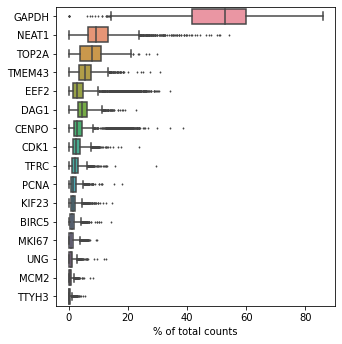

In [22]:
# Plot top 20 most expressed genes 
sc.pl.highest_expr_genes(adata, n_top=20)

## Regular Filtration

In [23]:
# Calculate QC metrics
sc.pp.calculate_qc_metrics(adata, percent_top=None, inplace=True)
# Calculate max count for each gene
adata.var['max_counts'] = adata.X.max(axis=0)

In [24]:
adata.obs

,orig_index,sample,area,x,y,z,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts
0,0,1,696855,89,4950,24,15,2.772589,403.0,6.001415
1,1,1,538053,83,7029,23,15,2.772589,262.0,5.572154
2,2,1,715678,117,2820,22,14,2.708050,278.0,5.631212
3,3,1,1313749,186,3765,23,15,2.772589,581.0,6.366470
4,4,1,561750,170,1387,26,15,2.772589,253.0,5.537334
...,...,...,...,...,...,...,...,...,...,...
3671,507,7,562496,13034,2515,17,16,2.833213,411.0,6.021023
3672,508,7,613527,13057,6526,16,16,2.833213,722.0,6.583409
3673,509,7,588370,13041,7724,16,15,2.772589,586.0,6.375025
3674,510,7,597927,13050,5507,16,14,2.708050,393.0,5.976351


In [25]:
adata.var

,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,max_counts
EEF2,3425,34.990479,3.583254,6.828074,128625.0,11.764665,500.0
TFRC,3408,9.428727,2.344564,7.290533,34660.0,10.453370,86.0
NEAT1,3639,33.332153,3.536082,1.006529,122529.0,11.716111,381.0
TOP2A,3645,21.540533,3.115315,0.843308,79183.0,11.279530,116.0
DAG1,3587,18.638739,2.977504,2.421110,68516.0,11.134837,258.0
MKI67,2667,6.347661,1.994382,27.448313,23334.0,10.057710,149.0
TMEM43,3603,22.479326,3.156120,1.985854,82634.0,11.322188,216.0
TTYH3,1797,1.138466,0.760089,51.115343,4185.0,8.339500,16.0
BIRC5,2864,5.391458,1.854962,22.089227,19819.0,9.894446,66.0
PCNA,3105,7.491023,2.139009,15.533188,27537.0,10.223322,77.0


In [28]:
def plot_stats_per_cell(adata, color='sample', save=False):
    plt.figure(figsize=(15, 5))

    reads_per_cell = adata.obs['total_counts']
    genes_per_cell = adata.obs['n_genes_by_counts']

    plt.subplot(1, 3, 1)
    sns.histplot(reads_per_cell)
    plt.ylabel('# cells')
    plt.xlabel('# reads')

    plt.subplot(1, 3, 2)
    sns.histplot(genes_per_cell)
    plt.ylabel('# cells')
    plt.xlabel('# genes')

    plt.subplot(1, 3, 3)
    plt.title(
        'R=%f' % np.corrcoef(reads_per_cell.T, genes_per_cell)[0, 1])  # Pearson product-moment correlation coefficients
    sns.scatterplot(data=adata.obs, x='total_counts', y='n_genes_by_counts', hue=color, s=5)
    plt.xlabel("Reads per cell")
    plt.ylabel("Genes per cell")
    plt.legend(loc='lower right')
    plt.tight_layout()

    if save:
        # current_fig_path = os.path.join(os.getcwd(), "output/figures/cell_stats.pdf")
        current_fig_path = "./figures/cell_stats.pdf"
        plt.savefig(current_fig_path)
    plt.show()

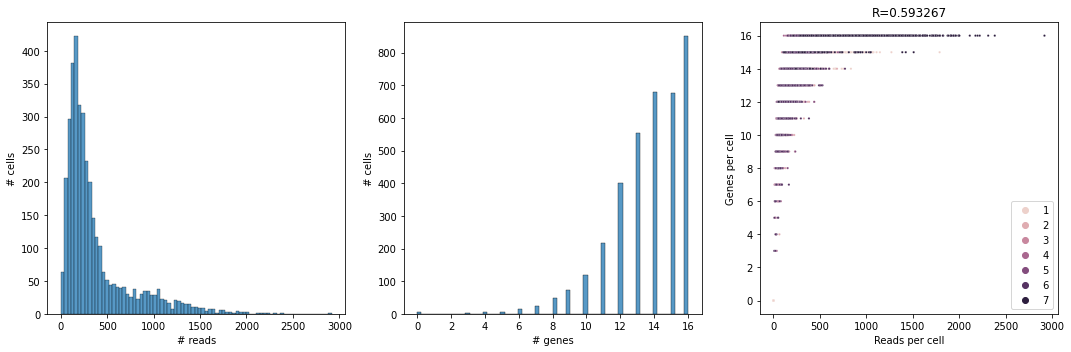

In [29]:
# Per-cell Stats Plot
plot_stats_per_cell(adata, save=False)

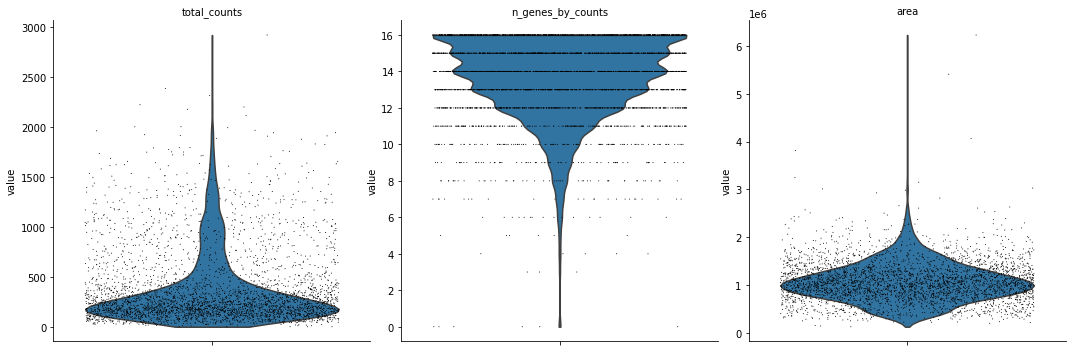

In [30]:
sc.pl.violin(adata, ['total_counts', 'n_genes_by_counts', 'area'],
             jitter=0.4, multi_panel=True)

In [31]:
# Get quantiles of reads
su.show_reads_quantile(adata)

Reads per cell quantile:
0.10     87.00
0.25    145.00
0.50    240.00
0.75    432.25
0.90    937.50
Name: total_counts, dtype: float64


## Output

In [33]:
from datetime import datetime
date = datetime.today().strftime('%Y-%m-%d')
adata.write_h5ad(os.path.join(ppath, '2022-09-29-Rena-HeLa16Gene-preflt.h5ad'))

In [34]:
# test
adata = sc.read_h5ad('Z:/Data/Processed/2022-09-12-Rena-HeLa16Gene/output/2022-09-29-Rena-HeLa16Gene-preflt.h5ad')

In [35]:
adata

AnnData object with n_obs × n_vars = 3676 × 16
    obs: 'orig_index', 'sample', 'area', 'x', 'y', 'z', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'max_counts'
    layers: 'nucleus'

In [36]:
adata.X

array([[ 28.,   7.,  22., ...,   9.,   9., 189.],
       [ 18.,   6.,  30., ...,  12.,   3., 113.],
       [ 15.,  19.,  24., ...,  21.,   6.,  98.],
       ...,
       [ 93.,  28.,  52., ..., 104.,  13., 131.],
       [ 46.,  21.,  14., ...,  64.,  16., 103.],
       [ 50.,   9.,  22., ...,  65.,   8.,  92.]], dtype=float32)

In [5]:
adata.var

,max_counts,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
MALAT1-m6A,327.0,8167,12.825692,2.626529,32.659960,155550.0,11.954729
WEE1-m6A,10.0,1432,0.185768,0.170391,88.192612,2253.0,7.720462
CCND1-m6A,9.0,2049,0.283146,0.249315,83.105211,3434.0,8.141772
CCNE1-m6A,7.0,1411,0.185026,0.169765,88.365765,2244.0,7.716461
BSG-m6A,22.0,5906,1.601171,0.955962,51.302770,19419.0,9.874059
...,...,...,...,...,...,...,...
UBE2Q1-non-m6A,47.0,3279,2.654931,1.296077,72.963391,32199.0,10.379722
TUG1-non-m6A,16.0,3079,1.005360,0.695823,74.612467,12193.0,9.408699
circNSUN2-non-m6A,19.0,2955,0.888440,0.635751,75.634894,10775.0,9.285077
pncRNA-D-non-m6A,4.0,215,0.018717,0.018544,98.227243,227.0,5.429346


In [6]:
adata.obs

,orig_index,well,area,x,y,z,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts
0,0,A1,34314,33,10444,21,0,0.000000,0.0,0.000000
1,1,A1,30768,39,3788,23,4,1.609438,6.0,1.945910
2,2,A1,160408,56,6912,22,61,4.127134,211.0,5.356586
3,3,A1,104124,48,11677,26,39,3.688879,71.0,4.276666
4,4,A1,211856,72,14823,17,74,4.317488,344.0,5.843544
...,...,...,...,...,...,...,...,...,...,...
12123,1189,B3,607304,5641,4666,15,45,3.828641,192.0,5.262690
12124,1190,B3,747089,5657,20158,24,48,3.891820,204.0,5.323010
12125,1191,B3,1220362,5688,7084,24,55,4.025352,220.0,5.398163
12126,1192,B3,664254,5683,4347,13,60,4.110874,254.0,5.541264


In [8]:
adata.layers['nucleus']

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [28.,  2.,  1., ...,  0.,  0.,  0.],
       [57.,  0.,  0., ...,  0.,  0.,  0.],
       [20.,  0.,  0., ...,  0.,  0.,  0.]])